In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def lgP (n, xi):
   """
   Evaluates P_{n}(xi) using an iterative algorithm
   """
   if n == 0:
      return np.ones (xi.size)
   elif n == 1:
      return xi
   else:
      fP = np.ones (xi.size); sP = xi.copy (); nP = np.empty (xi.size)
      for i in range (2, n + 1):
         nP = ((2 * i - 1) * xi * sP - (i - 1) * fP) / i
         fP = sP; sP = nP
      return nP

In [21]:
# Set the parameters below
# N: number of points
# nmax: maximum degree
N = 1000
nmax = 6

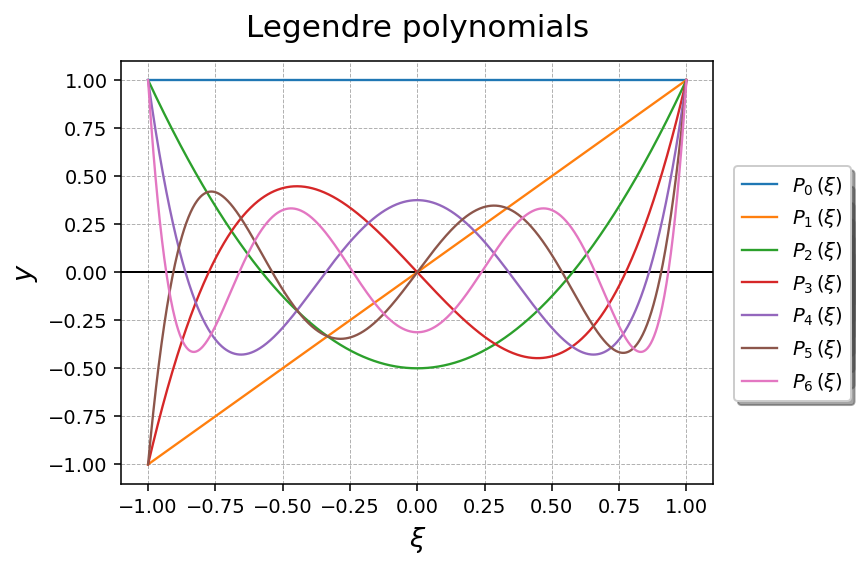

In [24]:
xi = np.linspace (-1, 1, N)
fig = plt.figure (figsize = (6, 4), dpi = 140)
for n in range (nmax + 1):
    plt.plot (xi, lgP (n, xi),
    label = r'$P_{{{}}}\,(\xi)$'.format (n),
    linewidth = 1.2, zorder = 3)
    plt.axhline (0, color = 'black', linewidth = 1, zorder = 2)
    plt.xlabel (r'$\xi$', fontsize = 14)
    plt.ylabel (r'$y$', fontsize = 14)
    plt.tick_params (axis = 'x', labelsize = 10)
    plt.tick_params (axis = 'y', labelsize = 10)
    fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
    plt.grid (linestyle = 'dashed', linewidth = 0.5)
    plt.title ('Legendre polynomials', fontsize = 16, y = 1.03)
    plt.subplots_adjust (right = 0.83)
plt.show ()

In [3]:
from Quadrature_Gauss_Lobatto import GaussLobattoquad, GaussLobatto_Points_Weights
fun = lambda x: x**10

val = GaussLobattoquad(npoints = 7, fun=fun)
print(val, 2.0/11.0)

0.1818181818181817 0.18181818181818182


In [5]:
from scipy.special import eval_jacobi
import numpy as np
x, w = GaussLobatto_Points_Weights(npoints=3)

V = np.zeros((3,3))
for j in range(3):
    V[:,j] = eval_jacobi(j,0,0,x)
print(V)

[[ 1.  -1.   1. ]
 [ 1.   0.  -0.5]
 [ 1.   1.   1. ]]


In [35]:
# Vandermonde Matrix
def Vandermonde1d(N,r):
    V1d = np.zeros((r.size, N+1),dtype=np.float64)
    for i in range(r.size):
        for j in range(3):
            V1d[i,j] = eval_jacobi(j,0,0,r[i])
    return V1d

# Mass matrix on [-1,1]
def MassMatrix(order=1):
    r, w = GaussLobatto_Points_Weights(npoints=order+1)
    V1d = Vandermonde1d(order,r)
    return (2.0*order+1.0)/2.0*np.linalg.inv(V1d@V1d.T)

M = MassMatrix(order=5)
print(np.linalg.cond(M))

fun = lambda x:  (2.0*4+1.0)/2.0* eval_jacobi(4,0,0,x) * eval_jacobi(4,0,0,x)
GaussLobattoquad(npoints=5, fun=fun)

2.7646004972795226e+17


2.25

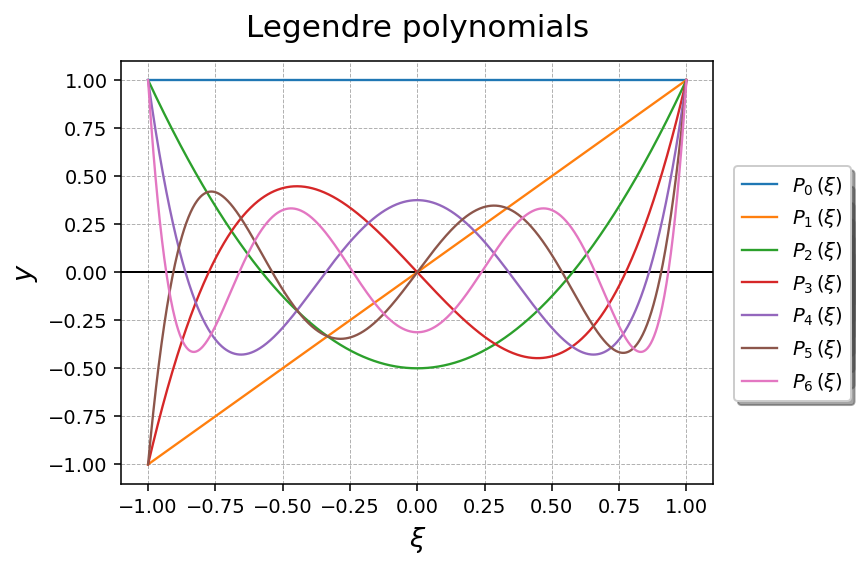

In [26]:
xi = np.linspace (-1, 1, N)
fig = plt.figure (figsize = (6, 4), dpi = 140)
for n in range (nmax + 1):
   plt.plot (xi, eval_jacobi (n, 0,0, xi),
             label = r'$P_{{{}}}\,(\xi)$'.format (n),
             linewidth = 1.2, zorder = 3)
   plt.axhline (0, color = 'black', linewidth = 1, zorder = 2)
   plt.xlabel (r'$\xi$', fontsize = 14)
   plt.ylabel (r'$y$', fontsize = 14)
   plt.tick_params (axis = 'x', labelsize = 10)
   plt.tick_params (axis = 'y', labelsize = 10)
   fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
   plt.grid (linestyle = 'dashed', linewidth = 0.5)
   plt.title ('Legendre polynomials', fontsize = 16, y = 1.03)
   plt.subplots_adjust (right = 0.83)
plt.show ()